In [2]:
## personal imports
from modeler.modeler import Modeler as m
from processor.processor import Processor as p
from database.market import Market
from database.adatabase import ADatabase
from functional.backtester import Backtester as b
from transformer.adhoc_transforms import Adhoc as adhocs
from transformer.risk_transforms import Risk as risks
from transformer.analysis_transforms import Analysis as anas

## standard imports
from statistics import variance
import math
from datetime import datetime, timedelta
import pytz
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
start_date = datetime(2020,1,1)
end_date = datetime(2023,1,1)

In [4]:
market = Market()
strats = ["dividends","earnings","fin","sector"]

In [5]:
market.connect()
sp500 = market.retrieve("sp500")
market.disconnect()
sp500 = sp500.rename(columns={"Symbol":"ticker"})

In [6]:
tyields = adhocs.tyields()
bench_returns = adhocs.spy_bench()

In [7]:
speculation_db = ADatabase(f"all_financial")
speculation_db.connect()
t = speculation_db.retrieve("trades")
speculation_db.disconnect()

In [8]:
reqs = [0.05]
signals = [0.05]
values = [True]
classifications = [True,False]
ceilings = [True,False]
floors = [True,False]
hedges = [False]
parameters = []
positions = 10
training_year = 4
for strat in strats:
    for value in values:
        for classification in classifications:
            for ceiling in ceilings:
                for floor in floors:
                    for hedge in hedges:
                        for signal in signals:
                            for req in reqs:
                                parameter = {"value":value
                                             ,"classification":classification
                                             ,"ceiling":ceiling
                                             ,"floor":floor
                                             ,"hedge":hedge
                                             ,"signal":signal
                                             ,"req":req
                                             ,"training_years":training_year
                                            ,"strat":strat
                                            }
                                parameters.append(parameter)

In [9]:
analysis = []
indexer = list(parameters[0].keys())
for parameter in parameters:
    try:
        ledger = t.sort_values(["year","week"]).copy()
        for key in parameter.keys():
            ledger = ledger[ledger[key]==parameter[key]]
        if ledger.index.size > 0:
            cumulative = anas.trade_analysis(indexer,ledger,positions,parameter,tyields,bench_returns)
            analysis.append(cumulative[indexer + ["pv","beta","rrr","sharpe"]].iloc[-1])
    except Exception as e:
        print(str(e))
        continue
a = pd.DataFrame(analysis)

In [10]:
a

,value,classification,ceiling,floor,hedge,signal,req,training_years,strat,pv,beta,rrr,sharpe
184,True,True,True,True,False,0.05,0.05,4,dividends,1.080092,-0.011028,1.046402,-2.511097
184,True,True,True,False,False,0.05,0.05,4,dividends,0.696039,-0.137562,0.977578,2.590543
184,True,True,False,True,False,0.05,0.05,4,dividends,1.165821,-0.146246,0.972855,-0.775547
184,True,True,False,False,False,0.05,0.05,4,dividends,0.646631,-0.167890,0.961083,2.416871
184,True,False,True,True,False,0.05,0.05,4,dividends,0.978844,-0.129984,0.981700,0.565887
184,True,False,True,False,False,0.05,0.05,4,dividends,0.583139,-0.059492,1.020041,7.887757
184,True,False,False,True,False,0.05,0.05,4,dividends,1.059326,-0.303795,0.887162,-0.022798
184,True,False,False,False,False,0.05,0.05,4,dividends,0.588707,-0.215046,0.935434,2.156253
184,True,True,True,True,False,0.05,0.05,4,earnings,1.202961,-0.115677,0.989482,-1.301568
184,True,True,True,False,False,0.05,0.05,4,earnings,0.920323,-0.292763,0.893163,0.451140


In [11]:
a.sort_values("pv",ascending=False).groupby("strat").first().reset_index().sort_values("pv")

,strat,value,classification,ceiling,floor,hedge,signal,req,training_years,pv,beta,rrr,sharpe
0,dividends,True,True,False,True,False,0.05,0.05,4,1.165821,-0.146246,0.972855,-0.775547
1,earnings,True,False,False,True,False,0.05,0.05,4,1.354960,-0.148369,0.971701,-2.039246
3,sector,True,False,False,True,False,0.05,0.05,4,1.392216,-0.065653,1.016691,-5.175982
2,fin,True,False,False,True,False,0.05,0.05,4,1.849985,-0.110242,0.992438,-7.234826


In [12]:
top = a.sort_values("pv",ascending=False).iloc[0]
analysis = t
for key in parameter.keys():
    analysis = analysis[(analysis[key]==top[key])]
ledger = analysis[["year","week","ticker","delta","actual_returns","position"]]
ledger = ledger.merge(sp500[["ticker","GICS Sector"]],on="ticker",how="left")

In [13]:
metric = "position"

In [14]:
portfolio = ledger.pivot_table(index=["year","week"],columns=metric,values="actual_returns").fillna(1).reset_index()

In [15]:
counted_columns = [x for x in range(positions)]
cumulative = portfolio[[i for i in counted_columns]].cumprod()
cumulative["date_string"] = [f'{int(row[1]["year"])}-W{int(row[1]["week"])}' for row in portfolio.iterrows()]
cumulative["date"] = [datetime.strptime(x + '-1', '%G-W%V-%u') for x in cumulative["date_string"]]
cumulative["pv"] = [sum([row[1][column] * 0.1 for column in counted_columns]) for row in cumulative.iterrows()]
bench = adhocs.spy_bench()
bench = bench.fillna(method="bfill")
cumulative = cumulative.merge(bench[["date","adjclose"]],on="date",how="left")
cumulative["bench"] = [1 + (row[1]["adjclose"] - cumulative["adjclose"].iloc[0]) / cumulative["adjclose"].iloc[0] for row in cumulative.iterrows()]
cumulative = cumulative.fillna(method="bfill")

In [16]:
cumulative

,0,1,2,3,4,5,6,7,8,9,date_string,date,pv,adjclose,bench
0,1.040000,1.010216,1.028010,1.020754,1.045255,1.026447,1.028977,0.993787,1.027468,0.950000,2019-W2,2019-01-07,1.017091,249.92,1.000000
1,1.062159,0.991443,1.026368,1.055807,1.066468,1.054616,0.999930,1.033877,1.041190,0.957449,2019-W3,2019-01-14,1.028931,254.38,1.017846
2,1.169900,0.941871,1.128771,1.028909,1.132063,1.071912,0.986449,1.071847,1.026280,0.957897,2019-W5,2019-01-28,1.051590,263.76,1.055378
3,1.190318,1.014527,1.153495,1.036977,1.150208,1.081817,1.008410,1.084570,1.009271,0.971468,2019-W6,2019-02-04,1.070106,263.76,1.055378
4,1.274015,0.993627,1.171768,1.111047,1.174413,1.066177,1.022143,1.084570,0.987936,0.953128,2019-W7,2019-02-11,1.083882,271.96,1.088188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1.989124,1.568181,2.366015,1.610141,1.143382,4.723122,0.780299,2.243487,1.706978,0.827469,2022-W47,2022-11-21,1.895820,395.12,1.580986
181,2.001218,1.619697,2.335203,1.640167,1.159811,4.486966,0.806219,2.352654,1.752758,0.846417,2022-W48,2022-11-28,1.900111,394.59,1.578865
182,1.999646,1.583240,2.352732,1.644141,1.144740,4.500329,0.810236,2.357748,1.773459,0.831306,2022-W49,2022-12-05,1.899758,395.91,1.584147
183,1.904592,1.574634,2.274705,1.621058,1.095955,4.557311,0.773242,2.262945,1.722817,0.816497,2022-W50,2022-12-12,1.860376,399.59,1.598872


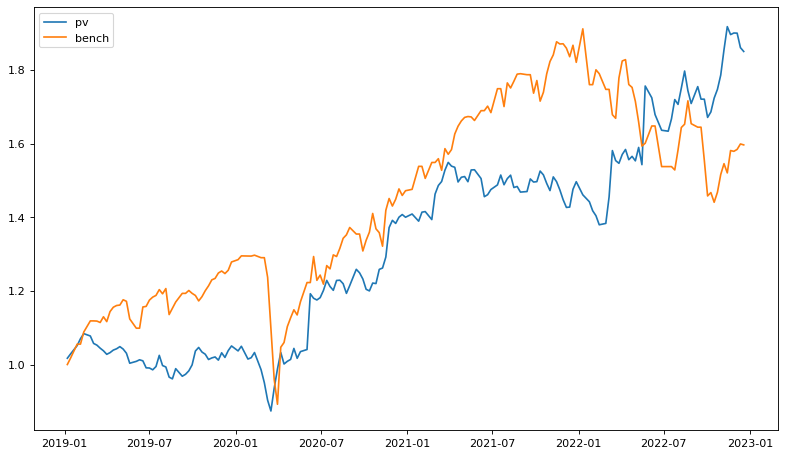

In [17]:
plt.figure(figsize=(12, 7), dpi=80)
plt.plot(cumulative["date"],cumulative["pv"])
plt.plot(cumulative["date"],cumulative["bench"])
plt.legend(["pv","bench"])

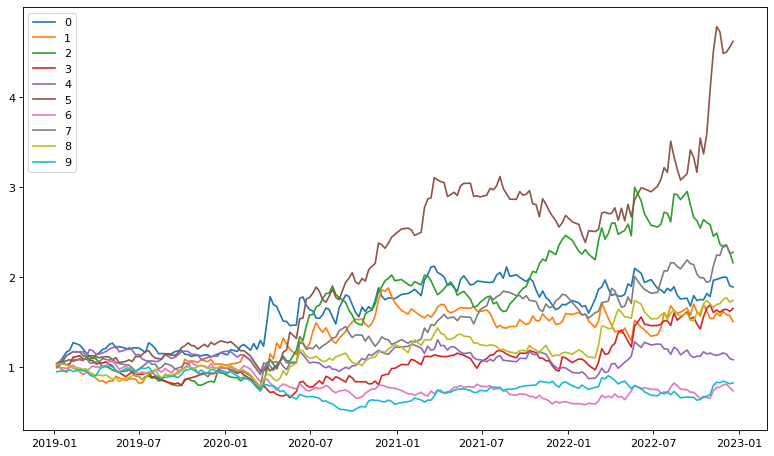

In [18]:
plt.figure(figsize=(12, 7), dpi=80)
for i in counted_columns:
    position = cumulative[i]
    plt.plot(cumulative["date"],position)
    plt.legend(counted_columns)
plt.show()


In [19]:
ledger.groupby(["GICS Sector"]).mean().sort_values("delta",ascending=False)

,year,week,delta,actual_returns,position
GICS Sector,,,,,
Energy,2020.222222,29.250000,0.201134,1.010599,3.833333
Consumer Discretionary,2020.528139,26.904762,0.120753,1.002204,3.772727
Industrials,2020.426901,27.368421,0.088837,1.004622,5.128655
Communication Services,2020.706667,31.626667,0.088722,1.015202,4.480000
Information Technology,2020.533923,26.162242,0.088721,1.002021,4.884956
Real Estate,2020.428571,31.767857,0.088411,1.004452,3.821429
Financials,2020.225490,29.186275,0.087200,1.007537,5.147059
Health Care,2020.590308,26.599119,0.074434,0.999535,4.740088
Materials,2020.488550,30.343511,0.071434,0.999539,4.900763


In [20]:
industry_analysis = ledger.pivot_table(index=["year","week"],columns="GICS Sector",values="actual_returns").fillna(1).reset_index()
industry_analysis[[x for x in industry_analysis.columns if x != "sell_date"]].cumprod()

GICS Sector,year,week,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
0,2.019000e+03,2.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.988734,1.024382,1.023647,1.000000,1.026447,1.000000
1,4.076361e+06,6.000000e+00,1.000000,0.999607,1.021307,0.981417,1.000000,1.022688,1.024382,1.048893,1.000000,1.026447,1.003122
2,8.230173e+09,3.000000e+01,1.000000,0.999607,1.021784,0.981417,1.036726,1.085591,1.020488,1.057388,1.101435,1.026447,1.003122
3,1.661672e+13,1.800000e+02,1.000000,1.013769,1.021784,0.981417,1.036726,1.095621,1.063849,1.068182,1.125561,1.026447,1.003122
4,3.354916e+16,1.260000e+03,1.070314,1.007206,1.021784,1.026794,1.017154,1.095621,1.063404,1.068182,1.125561,1.026447,1.003122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,inf,1.890996e+243,2.487620,0.918856,0.952047,1.885443,1.692515,0.878527,1.145632,1.281015,1.012888,1.259721,1.005091
181,inf,9.076781e+244,2.487620,0.898678,0.952047,1.898008,1.748115,0.921275,1.180023,1.281015,1.012888,1.259721,1.028106
182,inf,4.447623e+246,2.517000,0.896799,0.952047,1.855286,1.748115,0.924686,1.171247,1.281015,1.012888,1.259721,1.030332
183,inf,2.223811e+248,2.473112,0.891924,0.938681,1.789264,1.748115,0.908214,1.124152,1.281015,0.972969,1.259721,1.030332
